**Processamento Digital de Imagens - 2022/01**<br/>
**Engenharia da Computação**<br/>
**Aluno:** Gabriel Soares Baptista, 2018102117<br/>

### Questão 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage

### Resolução

Primeiro lemos a imagem que iremos segmentar.

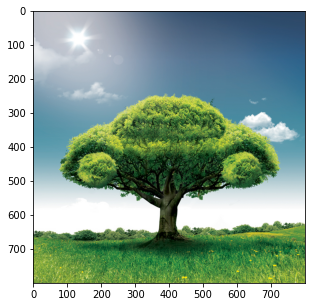

In [2]:
image = skimage.io.imread('../images/tree_car_by_hansenhui.jpg')

plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.show()

Temos que ter um critério para utilizar no algoritmo de crescimento de região, portanto, iremos obter duas áreas da copa em que o tom de verde são divergentes para capturar suas médias e utilizar a distância euclidiana para aderir ou não um pixel qualquer.

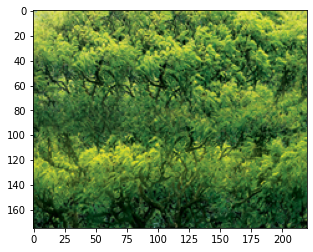

In [3]:
N, M = image.shape[:2]
q_condition = image[N//2-125:N//2+50, M//2-100:M//2+120]
plt.imshow(q_condition)
plt.show()

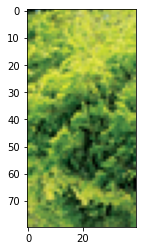

In [4]:
N, M = image.shape[:2]
q_condition2 = image[N//2+20:N//2+100, M//2-240:M//2-200]
plt.imshow(q_condition2)
plt.show()

Valor médio utilizado como critério de distância no espaço rgb: [ 78 115  49]


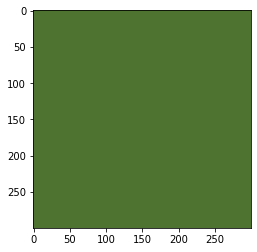

In [5]:
q_condition = np.mean(q_condition, axis=(0, 1))
print(f'Valor médio utilizado como critério de distância no espaço rgb: {np.array(q_condition, dtype="uint8")}')
plt.imshow(np.array(np.ones(shape=(300, 300, 3)) * q_condition, dtype='uint8'))
plt.show()

Valor médio utilizado como critério de distância no espaço rgb: [110 144  57]


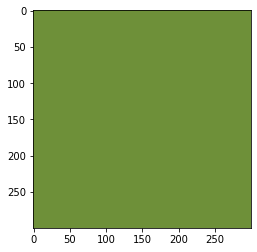

In [6]:
q_condition2 = np.mean(q_condition2, axis=(0, 1))
print(f'Valor médio utilizado como critério de distância no espaço rgb: {np.array(q_condition2, dtype="uint8")}')
plt.imshow(np.array(np.ones(shape=(300, 300, 3)) * q_condition2, dtype='uint8'))
plt.show()

O ponto inicial de crescimento da região será o meio da imagem, uma vez que corresponde a um ponto dentro da copa da árvore.

In [7]:
sx, sy = 400, 400

Agora iremos aplicar o algoritmo de crescimento de região, através de um procedimento bem simplório. Basicamente, a partir do ponto início fornecido, adicionamos as adjacências do pixel em uma lista de pixels que devem ser verificados, para cada pixel computamos a distância euclidiana entre os dois tons de verde utilizados, caso a distância seja menor que um dos thresholds definidos aceitamos o pixel e adicionamos suas adjacências, caso contrário pegamos o próximo pixel que devemos computar da lista.

In [8]:
def region_growing(image: np.array, sx, sy, criteria1, criteria2):
    N, M = image.shape[:2]

    # criamos a máscara de pixels aceitos
    mask = np.zeros(shape=(N, M), dtype='bool')
    pass_mask = np.zeros(shape=(N, M))
    mask[sx, sy] = 1

    # lista com os pixels que devem ser verificados, inicialmente
    # adiciona-se o píxel informado como a semente da região
    to_check = [(sx, sy)]

    while len(to_check) != 0:
        px, py = to_check.pop()
        
        # verificamos se está no limite da imagem
        if px == N or py == M or pass_mask[px, py]:
            continue
        else:
            pass_mask[px, py] = 1
        
        # verifica se o pixel é da adjacência de outro píxel que foi selecionado
        check_adjacency = np.sum(mask[px-1:px+2, py-1:py+2])

        #  Caso esteja na adjacência, aceita se a distância estiver dentro de um
        # dos dois thresholds
        if check_adjacency > 0:
            distance0 = np.sqrt(np.sum((image[px, py] - criteria1)**2))
            distance1 = np.sqrt(np.sum((image[px, py] - criteria2)**2))

            if distance0 <= 80 or distance1 <= 100:
                mask[px, py] = 1
                to_check.append((px + 1, py + 1))
                to_check.append((px + 1, py - 1))
                to_check.append((px + 1, py))
                to_check.append((px, py + 1))
                to_check.append((px, py - 1))
                to_check.append((px - 1, py + 1))
                to_check.append((px - 1, py - 1))
                to_check.append((px - 1, py))

    return mask

Aplica-se o algoritmo na imagem lida, utilizando como critério a média das cores das duas regiõs selecionadas e com a semente da região no ponto central da imagem.

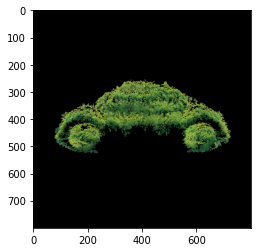

In [9]:
# obtém a máscara de pixels selecionados
mask = region_growing(image, 400, 400, q_condition, q_condition2)
result_image = np.zeros(image.shape, dtype='uint8')

# Seleciona os pixels da imagem original pela máscara
for i in range(N):
    for j in range(M):
        if mask[i, j] == 1:
            result_image[i, j] = image[i, j]

plt.imshow(result_image)
plt.show()

Podemos observar que o algoritmo funciona relativamente bem, entretanto, para uma melhor visualização da área selecionada, podemos subtrair a imagem selecionada da imagem original, permitindo-nos observar as áreas não aderidas à copa da árvore e consequentemente a qualidade do algoritmo empregado.

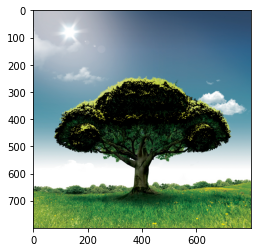

In [10]:
plt.imshow(image - result_image)
plt.show()